In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_style("darkgrid")
sns.set_context("notebook")
current_palette = sns.color_palette("hls", 8)
fig,_ = plt.subplots(figsize=(10,5))

In [22]:
file = 'data/human_body_temperature.csv'

In [23]:
df = pd.read_csv(file)

In [24]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Question 1
## Is the distribution of body temperatures normal?

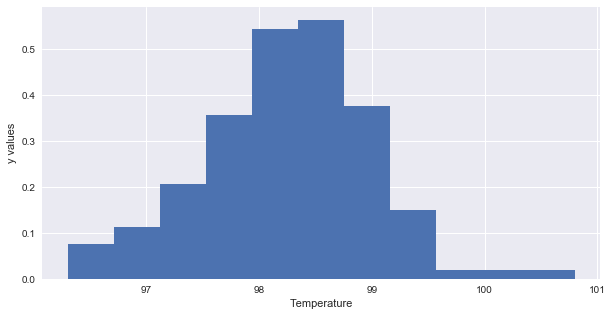

In [34]:

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(len(df['temperature']))

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

_ = plt.hist(df['temperature'], normed=True, bins=n_bins)
_ = plt.xlabel('Temperature')

_ = plt.ylabel('y values')

plt.show()

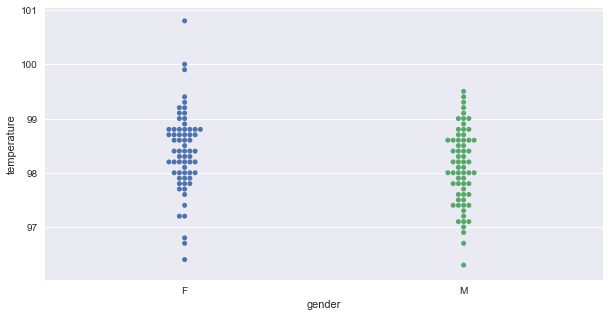

In [46]:
fig,_ = plt.subplots(figsize=(10,5))
_ = sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('gender')
_ = plt.ylabel('temperature')

plt.show()

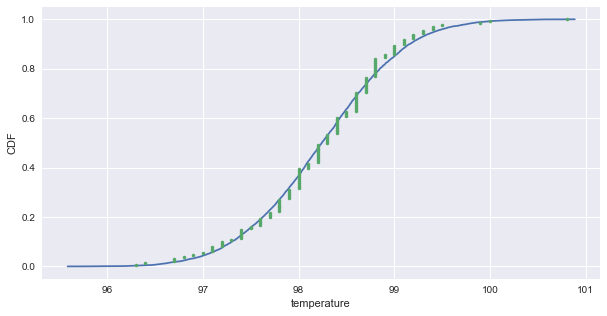

In [54]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

fig,_ = plt.subplots(figsize=(10,5))

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

In [39]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [40]:
np.mean(df['temperature'])

98.249230769230749

In [41]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [ ]:
x_tem, y_tem = ecdf(df.temperature)

